# Charlottesville Fire Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data location https://opendata.charlottesville.org/datasets/charlottesville::historical-fire-data/about

In [2]:
df = pd.read_csv('Historical_Fire_Data.csv')

In [3]:
df

,RecordID,Incident_ID,AddressRaw,AddressStandardized,AlarmDateTimeAmericaNY,CauseOfIgnition,FireAreaOfOrigin,FireType,HeatSource,IncidentDurationMinutes,...,PropertyUse,StreetName,StreetNumber,StreetPostDirection,StreetPredirection,StreetSuffix,UnitFirstArrive,UnitFirstResponseTimeMinutes,Year,ZipCode
0,1,3050152,1222 LEE ST,1222 LEE ST,2005/04/19 20:04:14+00,Undetermined,NaN,Natural vegetation fire,Undetermined,6.383333,...,Street or road in commercial area,LEE,1222,NaN,NaN,ST,E7,3.050000,2005,22903
1,2,3050240,1900 CARR'S HILL RD,1900 CARR'S HILL RD,2005/06/03 20:09:03+00,Failure of equipment or heat source,"Attic: vacant, crawl space above top story, cu...",Structure Fire,Arcing,42.400000,...,1 or 2 family dwelling,CARR'S HILL,1900,NaN,NaN,RD,E6,2.666667,2005,22903
2,3,3500445,1605 JEFFERSON PARK,1605 JEFFERSON PARK AVE,2005/08/31 12:04:27+00,Failure of equipment or heat source,Office,Structure Fire,Arcing,18.316667,...,"Adult education center, college classroom",JEFFERSON PARK,1605,NaN,NaN,AVE,BC1,2.433333,2005,22903
3,4,3500453,478 FLOYD DR,478 FLOYD DR,2005/09/06 16:11:35+00,Undetermined,NaN,Natural vegetation fire,NaN,20.016667,...,Vehicle parking area,FLOYD,478,NaN,NaN,DR,E6,4.900000,2005,22908
4,5,2600043,768 PROSPECT AVE,768 PROSPECT AVE,2006/01/04 04:45:58+00,Unintentional,"Cooking area, kitchen",Structure Fire,"Molten, hot material",139.516667,...,1 or 2 family dwelling,PROSPECT,768,NaN,NaN,AVE,E7,5.566667,2006,22902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,1958,201900007118,2322 FONTAINE AVENUE,2322 FONTAINE AVE,2019/08/10 17:15:34+00,Unintentional,"Outside area, other",Outside equipment fire,"Hot or smoldering object, other",36.600000,...,Multifamily dwelling,FONTAINE,2322,NaN,NaN,AVE,TO10,3.590000,2019,22903
1958,1959,201900007403,601 CONCORD AVENUE,601 CONCORD AVE,2019/08/18 22:25:01+00,Unintentional,Undetermined,Building fire,Undetermined,310.750000,...,"Mercantile, business, other",CONCORD,601,NaN,NaN,AVE,TO10,8.300000,2019,22903
1959,1960,201900007596,1102 LEONARD STREET,1102 LEONARD ST,2019/08/23 19:37:59+00,NaN,NaN,"Cooking fire, confined to container",NaN,24.270000,...,Multifamily dwelling,LEONARD,1102,NaN,NaN,ST,BC1,4.570000,2019,22902
1960,1961,201900007736,SHAMROCK ROAD,SHAMROCK RD,2019/08/27 15:04:42+00,NaN,NaN,Brush or brush-and-grass mixture fire,NaN,22.550000,...,Railroad right of way,SHAMROCK,NaN,NaN,NaN,RD,E10,5.110000,2019,22903


In [4]:
df.columns

Index(['RecordID', 'Incident_ID', 'AddressRaw', 'AddressStandardized',
       'AlarmDateTimeAmericaNY', 'CauseOfIgnition', 'FireAreaOfOrigin',
       'FireType', 'HeatSource', 'IncidentDurationMinutes', 'ItemFirstIgnited',
       'Latitude', 'Longitude', 'PropertyLossDollars', 'PropertyUse',
       'StreetName', 'StreetNumber', 'StreetPostDirection',
       'StreetPredirection', 'StreetSuffix', 'UnitFirstArrive',
       'UnitFirstResponseTimeMinutes', 'Year', 'ZipCode'],
      dtype='object')

In [5]:
df.Year

0       2005
1       2005
2       2005
3       2005
4       2006
        ... 
1957    2019
1958    2019
1959    2019
1960    2019
1961    2019
Name: Year, Length: 1962, dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

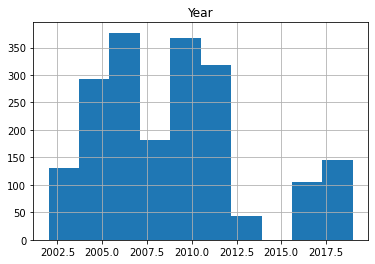

In [6]:
df.hist('Year')

In [35]:
years = df.Year.to_list()

In [40]:
np.unique(years)

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2016, 2017, 2018, 2019])

In [8]:
df.groupby('FireType').Year.count().sort_values(ascending = False)

FireType
Structure Fire                                       687
Natural vegetation fire                              429
Mobile property (vehicle) fire                       348
Outside rubbish fire                                 121
Building fire                                         64
Special outside fire                                  64
Cooking fire, confined to container                   52
Fire, other                                           48
Brush or brush-and-grass mixture fire                 30
Passenger vehicle fire                                26
Natural vegetation fire, other                        15
Outside rubbish, trash or waste fire                  11
Cultivated vegetation, crop fire                      11
Fire in mobile property used as a fixed structure      9
Outside equipment fire                                 8
Outside rubbish fire, other                            6
Chimney or flue fire, confined to chimney or flue      6
Trash or rubbish fire,

In [9]:
counts = df.value_counts(['FireType', 'Year']).to_frame()
counts

0
FireType                               Year    
Structure Fire                         2011  89
                                       2010  87
Natural vegetation fire                2006  80
Structure Fire                         2008  78
Natural vegetation fire                2007  71
...                                          ..
Fire, other                            2006   1
Special outside fire                   2005   1
Fire, other                            2007   1
Road freight or transport vehicle fire 2019   1
Fire, other                            2005   1

[121 rows x 1 columns]

In [10]:
year = df.value_counts(['Year', 'FireType']).to_frame()
year
# year_type.rename(columns = {0: 'count'}, inplace = True)

0
Year FireType                                  
2011 Structure Fire                          89
2010 Structure Fire                          87
2006 Natural vegetation fire                 80
2008 Structure Fire                          78
2009 Structure Fire                          71
...                                          ..
2016 Outside rubbish, trash or waste fire     1
     Special outside fire, other              1
2017 Grass fire                               1
     Mobile property (vehicle) fire, other    1
2019 Road freight or transport vehicle fire   1

[121 rows x 1 columns]

In [11]:
year = year.sort_values(by = 'Year', ascending = True)
year

0
Year FireType                                            
2002 Mobile property (vehicle) fire                     1
     Natural vegetation fire                            1
     Structure Fire                                     4
2003 Special outside fire                               2
     Fire in mobile property used as a fixed structure  1
...                                                    ..
2019 Brush or brush-and-grass mixture fire              4
     Cooking fire, confined to container                8
     Natural vegetation fire, other                     7
     Fires in structure other than in a building        1
     Road freight or transport vehicle fire             1

[121 rows x 1 columns]

In [12]:
year.rename(columns = {0:'count'}, inplace = True)
year

count
Year FireType                                                
2002 Mobile property (vehicle) fire                         1
     Natural vegetation fire                                1
     Structure Fire                                         4
2003 Special outside fire                                   2
     Fire in mobile property used as a fixed structure      1
...                                                       ...
2019 Brush or brush-and-grass mixture fire                  4
     Cooking fire, confined to container                    8
     Natural vegetation fire, other                         7
     Fires in structure other than in a building            1
     Road freight or transport vehicle fire                 1

[121 rows x 1 columns]

In [13]:
year.value_counts()

count
1        25
2        19
8         7
4         7
3         5
30        4
6         4
5         4
7         3
10        3
71        2
43        2
39        2
33        2
28        2
26        2
19        2
18        2
16        2
9         2
78        1
50        1
64        1
63        1
80        1
61        1
87        1
56        1
55        1
35        1
49        1
47        1
37        1
32        1
27        1
24        1
23        1
13        1
11        1
89        1
dtype: int64

In [14]:
year.index

MultiIndex([(2002,                    'Mobile property (vehicle) fire'),
            (2002,                           'Natural vegetation fire'),
            (2002,                                    'Structure Fire'),
            (2003,                              'Special outside fire'),
            (2003, 'Fire in mobile property used as a fixed structure'),
            (2003,                                       'Fire, other'),
            (2003,                           'Natural vegetation fire'),
            (2003,                    'Mobile property (vehicle) fire'),
            (2003,                                    'Structure Fire'),
            (2004, 'Fire in mobile property used as a fixed structure'),
            ...
            (2019,                                     'Building fire'),
            (2019,              'Outside rubbish, trash or waste fire'),
            (2019,                       'Outside rubbish fire, other'),
            (2019,                 

In [17]:
year.reset_index().set_index("Year")

,FireType,count
Year,,
2002,Mobile property (vehicle) fire,1
2002,Natural vegetation fire,1
2002,Structure Fire,4
2003,Special outside fire,2
2003,Fire in mobile property used as a fixed structure,1
...,...,...
2019,Brush or brush-and-grass mixture fire,4
2019,"Cooking fire, confined to container",8
2019,"Natural vegetation fire, other",7


In [18]:
year.reset_index().set_index("Year")

,FireType,count
Year,,
2002,Mobile property (vehicle) fire,1
2002,Natural vegetation fire,1
2002,Structure Fire,4
2003,Special outside fire,2
2003,Fire in mobile property used as a fixed structure,1
...,...,...
2019,Brush or brush-and-grass mixture fire,4
2019,"Cooking fire, confined to container",8
2019,"Natural vegetation fire, other",7


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

<Figure size 1440x864 with 0 Axes>

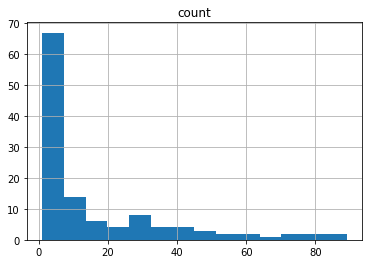

In [20]:
plt.figure(figsize=(20,12))

# sns.histplot(data=year_type, x='Year', hue="FireType", multiple="stack", bins = years, shrink=.8)

year.hist(bins = 14)#, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False,  data=None, **kwargs)

In [21]:
df.groupby('Year')['FireType'].count().to_frame()

,FireType
Year,
2002,6
2003,124
2004,144
2005,148
2006,194
2007,183
2008,181
2009,175
2010,193


In [22]:
df[['Year', 'FireType']].groupby('FireType').count()

,Year
FireType,
Brush or brush-and-grass mixture fire,30
Building fire,64
"Chimney or flue fire, confined to chimney or flue",6
"Cooking fire, confined to container",52
"Cultivated vegetation, crop fire",11
Dumpster or other outside trash receptacle fire,5
Fire in mobile home used as fixed residence,1
Fire in mobile property used as a fixed structure,9
"Fire, other",48


In [23]:
df[['Year', 'FireType']]

,Year,FireType
0,2005,Natural vegetation fire
1,2005,Structure Fire
2,2005,Structure Fire
3,2005,Natural vegetation fire
4,2006,Structure Fire
...,...,...
1957,2019,Outside equipment fire
1958,2019,Building fire
1959,2019,"Cooking fire, confined to container"
1960,2019,Brush or brush-and-grass mixture fire


In [24]:
df[['Year', 'FireType']].groupby('Year').count()

,FireType
Year,
2002,6
2003,124
2004,144
2005,148
2006,194
2007,183
2008,181
2009,175
2010,193


In [45]:
df[['Year', 'FireType']].value_counts(['Year', 'FireType'])

Year  FireType                              
2011  Structure Fire                            89
2010  Structure Fire                            87
2006  Natural vegetation fire                   80
2008  Structure Fire                            78
2009  Structure Fire                            71
                                                ..
2016  Outside rubbish, trash or waste fire       1
      Special outside fire, other                1
2017  Grass fire                                 1
      Mobile property (vehicle) fire, other      1
2019  Road freight or transport vehicle fire     1
Length: 121, dtype: int64

In [49]:
years = list(df.Year.unique())
years

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2002,
 2003,
 2004,
 2011,
 2012,
 2013,
 2016,
 2017,
 2018,
 2019]

In [50]:
years.sort()
years

[2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2016,
 2017,
 2018,
 2019]

no data for 2014 or 2015

<AxesSubplot:xlabel='Year', ylabel='Count'>

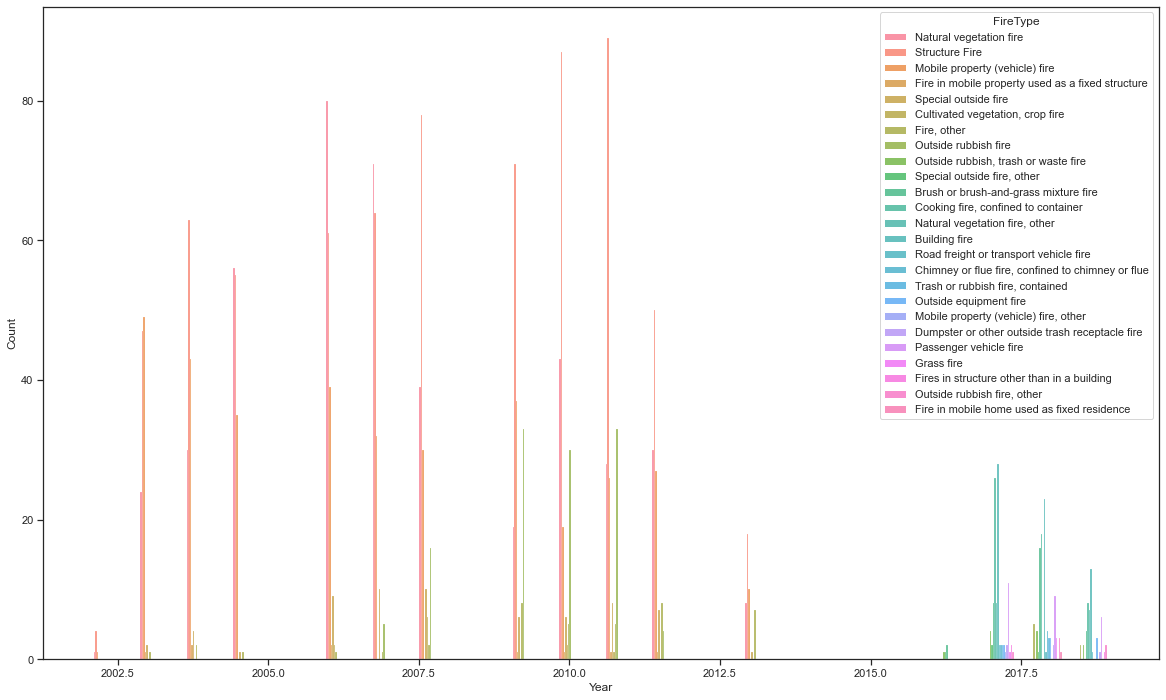

In [56]:
plt.figure(figsize=(20,12))

sns.histplot(data=df4, x="Year", hue="FireType", multiple="dodge", shrink=.8)

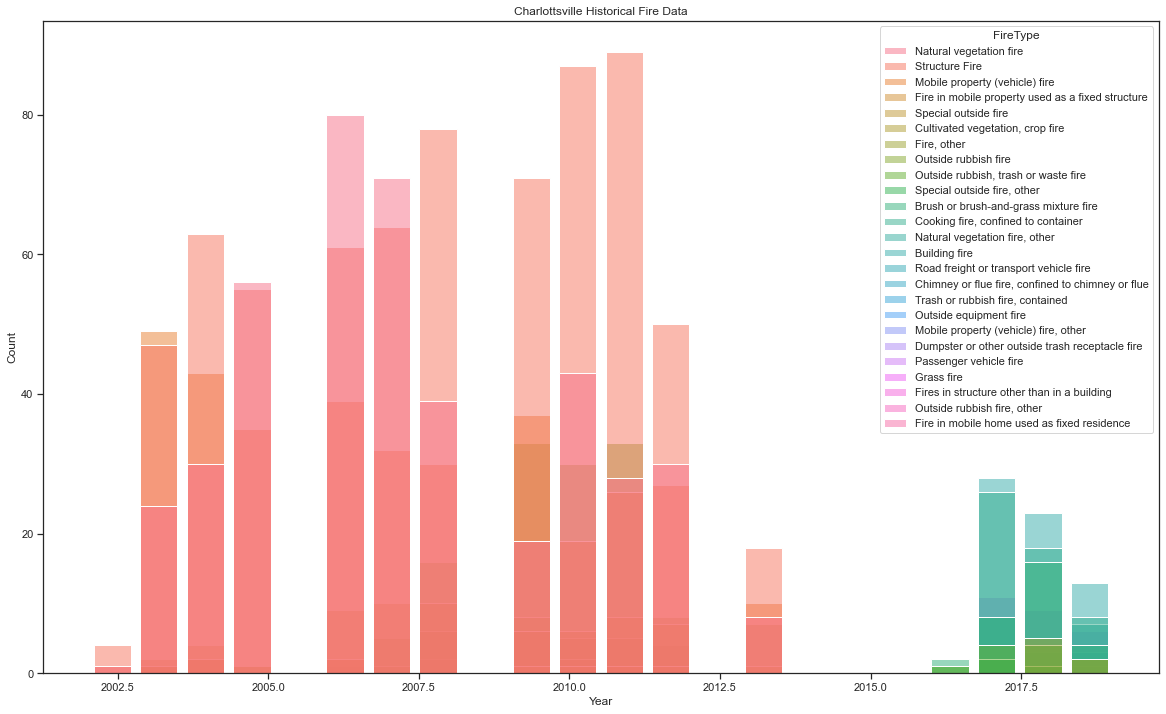

In [57]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

sns.histplot(data=df4, x='Year', hue="FireType", shrink=.8).set(title = "Charlottsville Historical Fire Data") #bins = years, hue="FireType", 

plt.savefig('CFD_Year_Plot.png')